In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Import necessary libraries
import pandas as pd
import numpy as np
import gdown
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




In [3]:
# Use gdown to download the file from Google Drive
file_id = '1dp71J_aYqtn7KfZPWFFqF6WJPfyph_1d'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'cleaned_data.csv'

gdown.download(url, output, quiet=False)

# Load the dataset (assuming it’s a CSV file)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1dp71J_aYqtn7KfZPWFFqF6WJPfyph_1d
To: /content/cleaned_data.csv
100%|██████████| 334k/334k [00:00<00:00, 47.0MB/s]


Accuracy: 0.256

Classification Report:
               precision    recall  f1-score   support

       Happy       0.22      0.25      0.23       208
     Neutral       0.32      0.31      0.31       352
    Stressed       0.30      0.26      0.28       298
       Tired       0.10      0.12      0.11       142

    accuracy                           0.26      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.26      0.26      0.26      1000


Confusion Matrix:
 [[ 52  75  48  33]
 [ 85 109  92  66]
 [ 69 102  78  49]
 [ 30  56  39  17]]


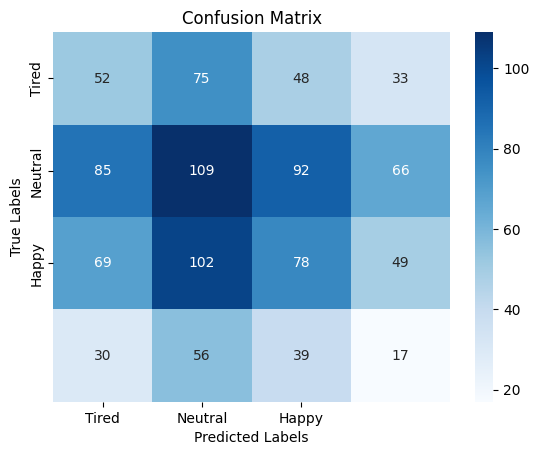

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
# Assuming a dataset with columns: 'steps', 'distance_km', and 'mood'
# mood: 2 = happy, 1 = neutral, 0 = tired


# Define features (X) and target variable (y)
X = data[['steps', 'distance_km']]
y = data['mood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=['Tired', 'Neutral', 'Happy'], yticklabels=['Tired', 'Neutral', 'Happy'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [12]:
 # Convert to DataFrame
df = pd.DataFrame(data)

# Grouping by sleep hours and calculating the mean heart rate
sleep_hours = [df[df['sleep_hours'] < 5],
                df[(df['sleep_hours'] >= 5) & (df['sleep_hours'] <= 7)],
                df[df['sleep_hours'] > 7]]


# Create labels and features
X = np.array([group['sleep_hours'].mean() for group in sleep_hours]).reshape(-1, 1)  # Mean sleep hours per group
y = np.array([group['heart_rate_avg'].mean() for group in sleep_hours])  # Mean heart rate per group

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(16, input_dim=1, activation='relu'),  # Input layer
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='linear')              # Output layer (regression task)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict heart rate based on sleep hours
predictions = model.predict(X_test)
print("Predictions:", predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8252.8887
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8256.6426 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8250.3818 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8249.4082 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8248.5752 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8253.3770 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8252.7422 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8246.6055 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8251.5830 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8251.0166 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8250.4561 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8249.9062
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8249.3564 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8243.8594 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

NameError: name 'history' is not defined

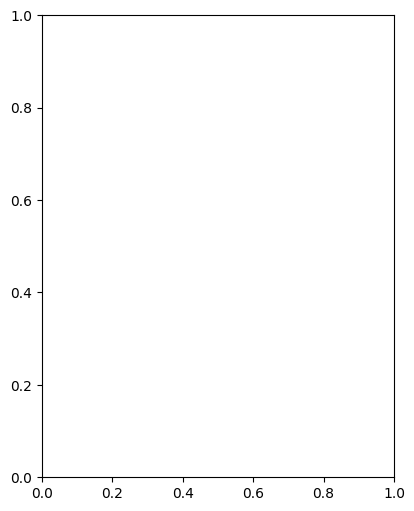

In [13]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the training history
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the sleep vs heart rate
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['sleep_hours'], y=df['average_heart_rate'], color='blue', label='Data Points')
sns.lineplot(x=X_test.flatten(), y=predictions.flatten(), color='red', label='Model Predictions')

plt.title('Sleep Hours vs Average Heart Rate')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Heart Rate')
plt.legend()

plt.tight_layout()
plt.show()